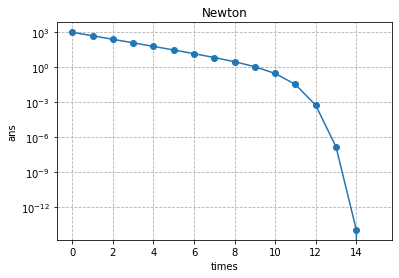

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 入力ファイルの設定
input_fname = 'ex3_file/output001.dat'

# 入力ファイルからデータを読み込む,空白を区切りとして読み込む,ヘッダーはなし
df = pd.read_table(input_fname, delim_whitespace=True, header=None)

# DをEに置換
df = df.applymap(lambda x: str(x).replace('D', 'E'))

# データ型を変換
df = df.astype(float)

# 2列目(反復回数)をx、1列目(解)をyとして指定,yは解1との差の絶対値を見る
x = df.iloc[:, 1]
y = np.abs(df.iloc[:, 0] - 1)

# グラフの作成
plt.plot(x, y, marker='o')
plt.xlabel('times')
plt.ylabel('ans')
plt.title('Newton')
# 対数軸の設定
plt.yscale('log')
# 両方のグリッド線を引く
plt.grid(True, which="both", ls="--")
plt.show()

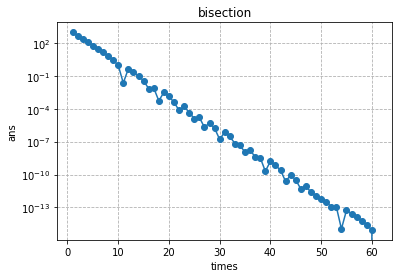

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# .datファイルからデータを読み込む
df = pd.read_table('ex4_file/output001.dat', delim_whitespace=True, header=None)

# DをEに置換
df = df.applymap(lambda x: str(x).replace('D', 'E'))

# データ型を変換
df = df.astype(float)

# 2列目(反復回数)をx、1列目(解)をyとして指定,yは解1との差の絶対値を見る
x = df.iloc[:, 1]
y = np.abs(df.iloc[:, 0] - 1)

# グラフの作成
plt.plot(x, y, marker='o')
plt.xlabel('times')
plt.ylabel('ans')
plt.title('bisection')
# 対数軸の設定
plt.yscale('log')
# 両方のグリッド線を引く
plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:
新たなデータ構造
Series...1次元のデータ(indexとdataのペア)column nameで列の名前を記述できる
  pd.Series (data=データの配列, index=インデックスの配列, name=列名)

DataFrame...2次元のデータ(2次元のdataとindex(行名)とcolumn(列名))
  pd.DataFrame(data = 格納するデータ, index = 行名, columns = 列名)
  Applymap...データフレームの全ての要素に関数を適用する

ディクショナリ...キーと値のペア
  a = {key1:value1,key2:value2,key3:value3}

pandasの使い方
データの整形に役に立つライブラリ
  データの読み込み
      read_csv...csvファイル(カンマ区切り)の読み込み
      read_table...テキストファイル(タブ区切り)の読み込み
      read_fwf...固定幅のテキストファイルの読み込み
      read_clipboard...クリップボードのデータの読み込み
  データの取り出し
      df.iloc[行,列]...行と列を指定してデータを取り出す
      df.loc[行名,列名]...行名と列名を指定してデータを取り出す

lambda式
無名関数を定義するための式
lambda 引数:返り値(式) の形で記述
defを使わずに関数を定義できる(1回しか使わない関数を定義するときに使う)
例
map(lambda x: x**2,l)  # lの各要素を2乗する
filter(lambda x: x>0,l)  # lの各要素をx>0のみにした値を出力する(イテレータ(次の値を示す)を返す)



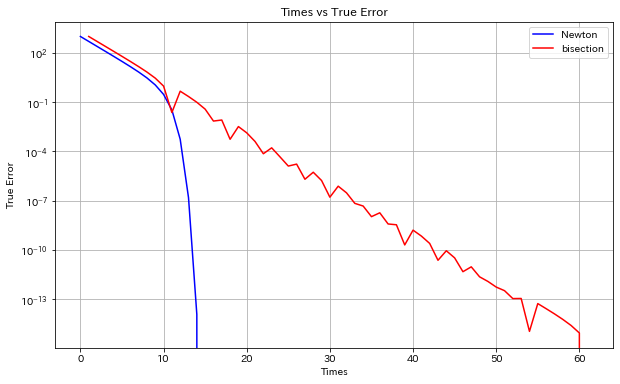

In [6]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import numpy as np

def read_and_process_data(filename):
    """データを読み込み、DをEに置換し、floatに変換する"""
    df = pd.read_table(filename, delim_whitespace=True, header=None)
    df = df.applymap(lambda x: str(x).replace('D', 'E')).astype(float)
    return df

def plot_data(x, y, label, color):
    """データをプロットする"""
    plt.plot(x, y, label=label, color=color)

# 入力ファイルの設定
input_fname1 = 'ex3_file/output001.dat'
input_fname2 = 'ex4_file/output001.dat'

# データの読み込みと処理
df1 = read_and_process_data(input_fname1)
df2 = read_and_process_data(input_fname2)

# xとyのデータを抽出
x1, y1 = df1.iloc[:, 1], np.abs(df1.iloc[:, 0] - 1)
x2, y2 = df2.iloc[:, 1], np.abs(df2.iloc[:, 0] - 1)

# グラフの設定とプロット
plt.figure(figsize=(10, 6))
plot_data(x1, y1, label='Newton', color='blue')
plot_data(x2, y2, label='bisection', color='red')

plt.xlabel('Times')
plt.ylabel('True Error')
plt.title('Times vs True Error')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()


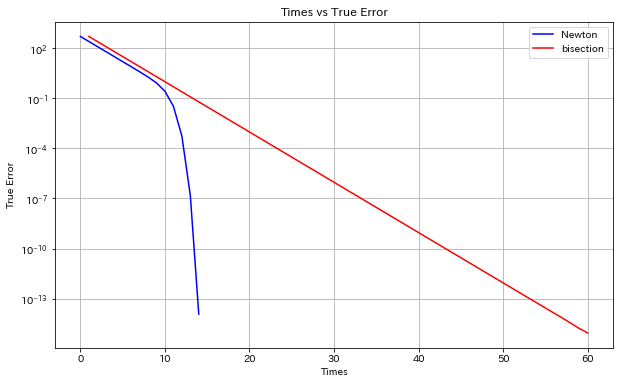

In [7]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import numpy as np

def read_and_process_data(filename):
    """データを読み込み、DをEに置換し、floatに変換する"""
    df = pd.read_table(filename, delim_whitespace=True, header=None)
    df = df.applymap(lambda x: str(x).replace('D', 'E')).astype(float)
    return df

def plot_data(x, y, label, color):
    """データをプロットする"""
    plt.plot(x, y, label=label, color=color)

# 入力ファイルの設定
input_fname1 = 'ex3_file/output001.dat'
input_fname2 = 'ex4_file/output001.dat'

# データの読み込みと処理
df1 = read_and_process_data(input_fname1)
df2 = read_and_process_data(input_fname2)

# xとyのデータを抽出
# データ列の差の絶対値|y(n+1) - yn|を取る
x1, y1 = df1.iloc[:, 1], np.abs(np.diff(df1.iloc[:, 0], n = 1))
x2, y2 = df2.iloc[:, 1], np.abs(np.diff(df2.iloc[:, 0], n = 1))

# データの長さを揃える
min_length1 = min(len(x1), len(y1))
min_length2 = min(len(x2), len(y2))
x1, y1 = x1[:min_length1], y1[:min_length1]
x2, y2 = x2[:min_length2], y2[:min_length2]

# グラフの設定とプロット
plt.figure(figsize=(10, 6))
plot_data(x1, y1, label='Newton', color='blue')
plot_data(x2, y2, label='bisection', color='red')

plt.xlabel('Times')
plt.ylabel('True Error')
plt.title('Times vs True Error')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()